<a href="https://colab.research.google.com/github/mujeebur-rehman-au52/CC1/blob/main/Zomato_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe =pd.read_csv("Zomato-data- (1).csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Data Cleaning and Preparation

In [3]:
# Convert the rate column to a float by removing characters

def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
# Getting Summary of the dataframe

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [6]:
# Checking for missing or null values to identify any data gaps.

dataframe.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


Exploring Restaurant Types

Text(0.5, 0, 'Type of Restaurant')

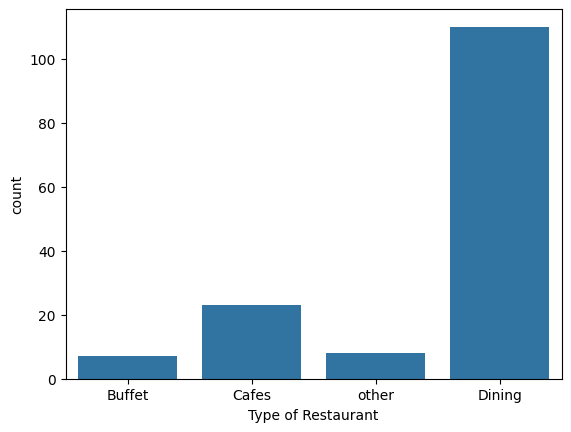

In [7]:
# Let's see the listed_in (type) column to identify popular restaurant categories.

sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

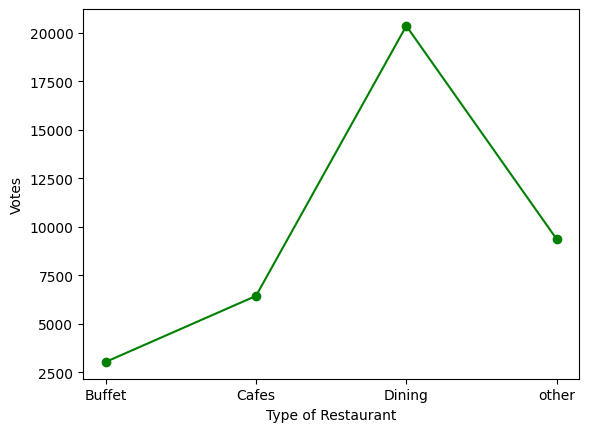

In [9]:
# Votes by Restaurant Type

grouped_data = dataframe.groupby('listed_in(type)') ['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of Restaurant')
plt.ylabel('Votes')

Identify the Most Voted Restaurant

In [10]:
# Restaurant with the highest number of votes

max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Online Order Availability

<Axes: xlabel='online_order', ylabel='count'>

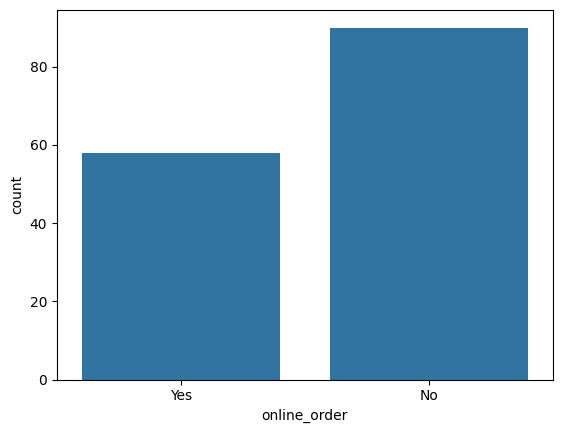

In [11]:
# Exploring the online_order column to see how many restaurants accept online orders.

sns.countplot(x=dataframe['online_order'])

Analyze Ratings

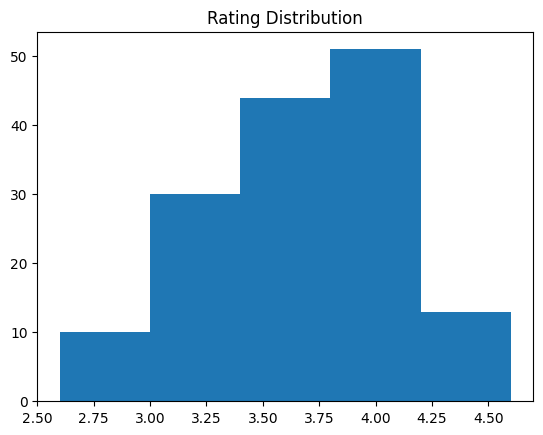

In [12]:
# Checking the distribution of rating from the rate column.

plt.hist(dataframe['rate'],bins=5)
plt.title('Rating Distribution')
plt.show()

Approximate Cost for Couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

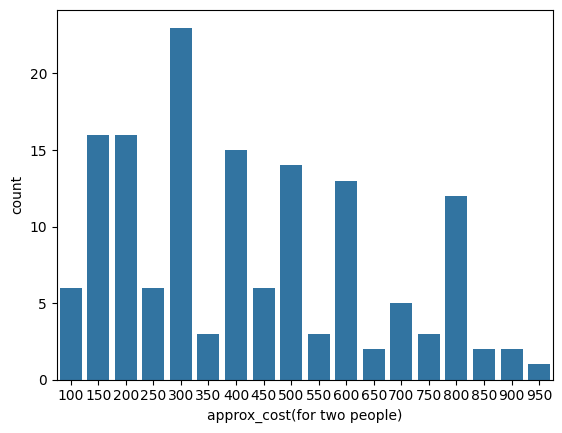

In [13]:
# Analyze the approx_cost(for two people) column to find the preferred price range.

couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

Ratings Comparison - Online vs Offline Orders

<Axes: xlabel='online_order', ylabel='rate'>

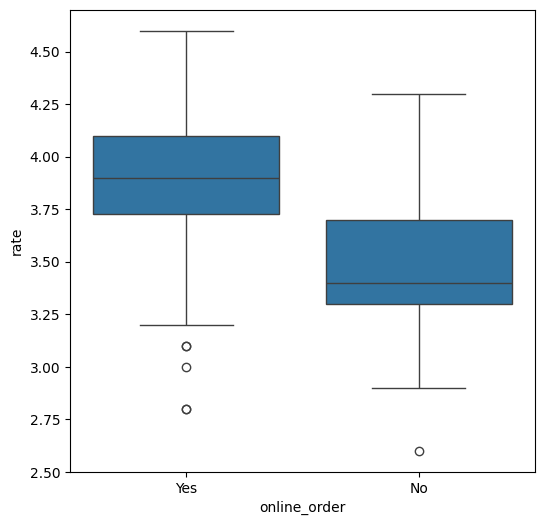

In [14]:
# Compare ratings between restaurant that accept online orders and those that don't

plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Order Mode Preferences by Restaurant Type

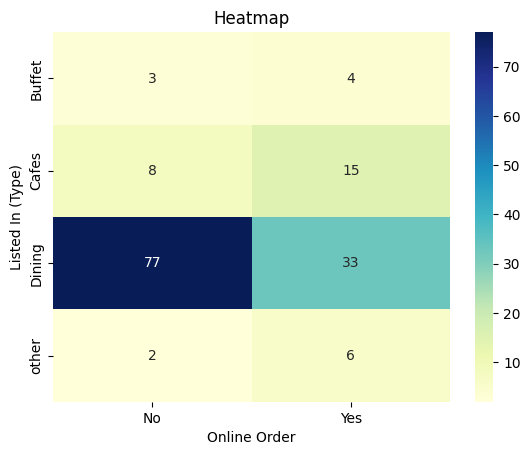

In [18]:
# Find the relationship between order mode (online_order) and restaurant type (listed_in(type)).

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()